In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from EpiModel import *

In [2]:
# Asymptomatic individuals are often less infectious than those displaying symptoms by some fraction rbeta
rbeta = 2 #0.75
# A fraction pₐ of all of those Exposed
pa = .7  #0.4 (ไม่เกิน 1)

R0 =1.5  #2.0 (ห้ามน้อยกว่า 1)
epsilon =  0.5 # 0.4 (ห้ามน้อยกว่า 0)
mu = .4 # 0.1  #(ห้ามน้อยกว่า 0)

beta = R0*mu/(pa*rbeta+(1-pa))

SEIIR = EpiModel()
SEIIR.add_interaction('S', 'E', 'Ia', rbeta*beta)
SEIIR.add_interaction('S', 'E', 'Is', beta)
SEIIR.add_spontaneous('E', 'Ia', epsilon*pa)
SEIIR.add_spontaneous('E', 'Is', epsilon*(1-pa))
SEIIR.add_spontaneous('Ia', 'R', mu)
SEIIR.add_spontaneous('Is', 'R', mu)

In [3]:
# Number of population
N = 1000 #100000 ต้องมากกว่า (S+Is+Ia+R+E)
# Initial number of Asymptomatic
I0 = 0.2 # (ห้ามน้อยกว่า 0)

In [4]:
# day = 200
# Ia = 2
# Is =5
# E = 0
# R =0
# S=N-(Ia+Is+I0+E+R)


day = 150
# Ia = 0
# Is = I0
# E = 0
# R =0
# S=N-I0

In [5]:
SEIIR.integrate(day, S=N-I0, Ia=0, Is=I0, E=0, R=0)
# SEIIR.integrate(day, S=N-I0, Ia=Ia, Is=I0, E=E, R=R)

In [6]:
# print(type(SEIIR.S/N))

print('Smin = ', (SEIIR.S/N).min())
print('Emin = ', (SEIIR.E/N).min())
print('Iamin = ', (SEIIR.Ia/N).min())
print('Ismin = ', (SEIIR.Is/N).min())
print('Rmin = ', (SEIIR.R/N).min())
print('-------------------------------------------------------')
print('Smax = ', (SEIIR.S/N).max())
print('Emax = ', (SEIIR.E/N).max())
print('Iamax = ', (SEIIR.Ia/N).max())
print('Ismax = ', (SEIIR.Is/N).max())
print('Rmax = ', (SEIIR.R/N).max())

Smin =  0.41762665629096946
Emin =  0.0
Iamin =  0.0
Ismin =  4.877157882251335e-05
Rmin =  0.0
-------------------------------------------------------
Smax =  0.9997999999999999
Emax =  0.028346976628008835
Iamax =  0.024447823649138407
Ismax =  0.010477638706773613
Rmax =  0.582060613639565


Text(0, 0.5, 'Population')

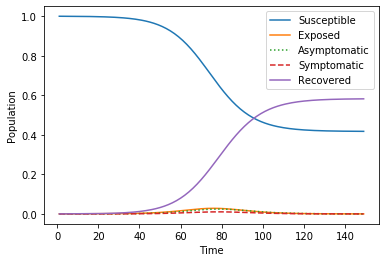

In [7]:
fig,ax = plt.subplots(1)
# fig= plt.figure(figsize=(15,6))
(SEIIR.S/N).plot( linestyle='-', label='Susceptible', ax=ax)
(SEIIR.E/N).plot(linestyle='-', label='Exposed', ax=ax)
(SEIIR.Ia/N).plot( linestyle=':', label='Asymptomatic', ax=ax)
(SEIIR.Is/N).plot( linestyle='--', label='Symptomatic', ax=ax)
(SEIIR.R/N).plot( linestyle='-', label='Recovered', ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

In [8]:
SEIIR.R/N

1      0.000000
2      0.000068
3      0.000121
4      0.000168
5      0.000213
         ...   
145    0.581686
146    0.581793
147    0.581890
148    0.581979
149    0.582061
Name: R, Length: 149, dtype: float64

Text(0, 0.5, 'Population')

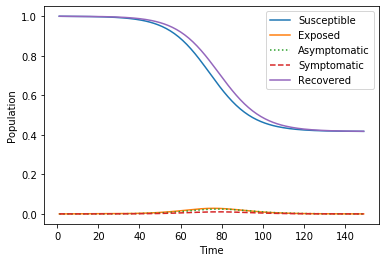

In [9]:
fig,ax = plt.subplots(1)
# fig= plt.figure(figsize=(15,6))
(SEIIR.S/N).plot( linestyle='-', label='Susceptible', ax=ax)
(SEIIR.E/N).plot(linestyle='-', label='Exposed', ax=ax)
(SEIIR.Ia/N).plot( linestyle=':', label='Asymptomatic', ax=ax)
(SEIIR.Is/N).plot( linestyle='--', label='Symptomatic', ax=ax)
(1-SEIIR.R/N).plot( linestyle='-', label='Recovered', ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

Text(0, 0.5, 'Population')

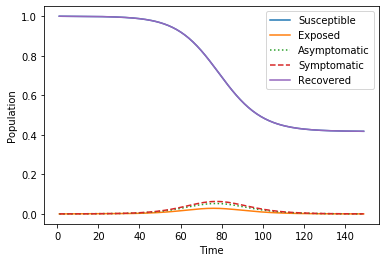

In [10]:
Sy, Ey, Iay, Isy, Ry = SEIIR.S/N, SEIIR.E/N, SEIIR.Ia/N, SEIIR.Is/N, SEIIR.R/N

Ef = Ey
Iaf = Iay+Ey
Isf = Isy+Iaf
Sf = Sy+Isf

fig,ax = plt.subplots(1)
# fig= plt.figure(figsize=(15,6))
(Sf).plot( linestyle='-', label='Susceptible', ax=ax)
ax.set_ylabel('between y1 and 0')
(Ef).plot(linestyle='-', label='Exposed', ax=ax)
(Iaf).plot( linestyle=':', label='Asymptomatic', ax=ax)
(Isf).plot( linestyle='--', label='Symptomatic', ax=ax)
(1-SEIIR.R/N).plot( linestyle='-', label='Recovered', ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Population')

In [11]:
t=np.arange(0, day-1)
print(len(t))
print(len(Sf))

149
149


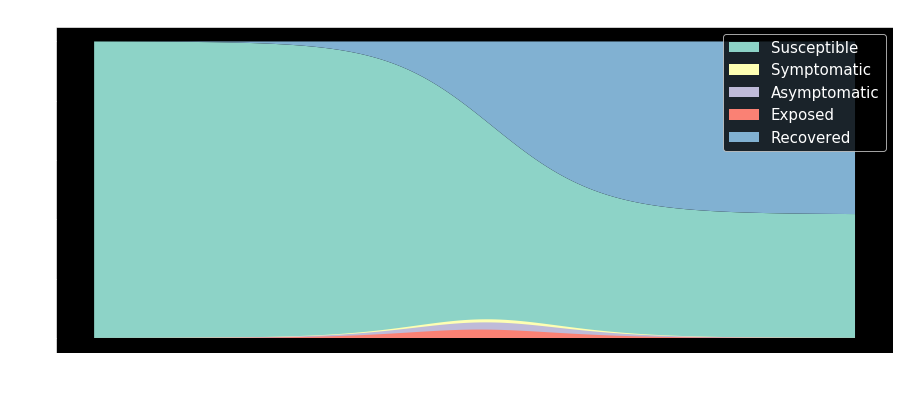

In [12]:
fig= plt.figure(figsize=(15,6))
plt.style.use('dark_background')
plt.fill_between(t, 0, Sf,  label='Susceptible')
plt.fill_between(t, 0, Isf,  label='Symptomatic')
plt.fill_between(t, 0, Iaf,  label='Asymptomatic')
plt.fill_between(t, 0, Ef,  label='Exposed')
plt.fill_between(t, 1-SEIIR.R/N,1,  label='Recovered')
plt.legend(prop={"size":15})

plt.title("Symptomatic/Asymptomatic model", fontsize=18)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.tick_params(labelsize=15)
plt.show()